In [26]:
from dask.distributed import Client, progress
# HPC
# client = Client(scheduler_file='/glade/scratch/jhamman/scheduler.json')
# client

from dask_kubernetes import KubeCluster
cluster = KubeCluster(n_workers=10)
cluster

/srv/conda/envs/notebook/lib/python3.6/site-packages/distributed/bokeh/core.py:74: UserWarning: 
Port 8787 is already in use. 
Perhaps you already have a cluster running?
Hosting the diagnostics dashboard on a random port instead.
  warnings.warn("\n" + msg)


In [27]:
client = Client(cluster)
client

Client Scheduler: tcp://10.32.1.180:38513 Dashboard: /user/0000-0001-7783-5629/proxy/36487/status,Cluster Workers: 0 Cores: 0 Memory: 0 B


In [28]:
import sys, glob
import numpy as np
import xarray as xr
import xscale.spectral.fft as xfft
import Wavenum_freq_spec_func as wfs


In [29]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
from matplotlib.colors import LogNorm

seq_cmap = mplcm.Blues
div_cmap = mplcm.seismic


In [32]:
%time

import gcsfs

fs = gcsfs.GCSFileSystem(project='pangeo-181919', token='anon', access='read_only')

gcsmapgrid=gcsfs.mapping.GCSMap('pangeo-data/eNATL60-BLBT02-SSV-1h',gcs=fs,check=False,create=False)
dsv=xr.open_zarr(gcsmapgrid)



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.87 µs


In [35]:
gcsmapgridu=gcsfs.mapping.GCSMap('pangeo-data/eNATL60-BLBT02-SSU-1h/eNATL60-BLBT02-SSU-1h',gcs=fs,check=False,create=False)
dsu=xr.open_zarr(gcsmapgridu)


In [37]:
gcsmapgridu=gcsfs.mapping.GCSMap('pangeo-data/eNATL60-BLBT02-SSU-1h',gcs=fs,check=False,create=False)
dsu=xr.open_zarr(gcsmapgridu)


ValueError: group not found at path ''

In [36]:
dsu

<xarray.Dataset>
Dimensions:       (time_counter: 8760, x: 8354, y: 4729)
Coordinates:
  * time_counter  (time_counter) datetime64[ns] 2009-07-01T00:30:00 ... 2010-06-30T23:30:00
Dimensions without coordinates: x, y
Data variables:
    nav_lat       (y, x) float32 dask.array<shape=(4729, 8354), chunksize=(296, 1045)>
    nav_lon       (y, x) float32 dask.array<shape=(4729, 8354), chunksize=(296, 1045)>
    sozocrtx      (time_counter, y, x) float32 dask.array<shape=(8760, 4729, 8354), chunksize=(24, 120, 120)>
Attributes:
    Conventions:  CF-1.6
    NCO:          4.4.6
    TimeStamp:    08/01/2019 09:34:23 +0100
    description:  ocean U grid variables
    file_name:    eNATL60-BLBT02_1h_20090630_20090704_gridU-2D_20090701-20090...
    history:      Fri May 24 23:57:12 2019: ncks -O -F -v sozocrtx /store/CT1...
    ibegin:       0
    jbegin:       0
    name:         /scratch/tmp/3746956/eNATL60-BLBT02_1h_20090630_20090704_gr...
    ni:           8354
    nj:           9
    timeStam

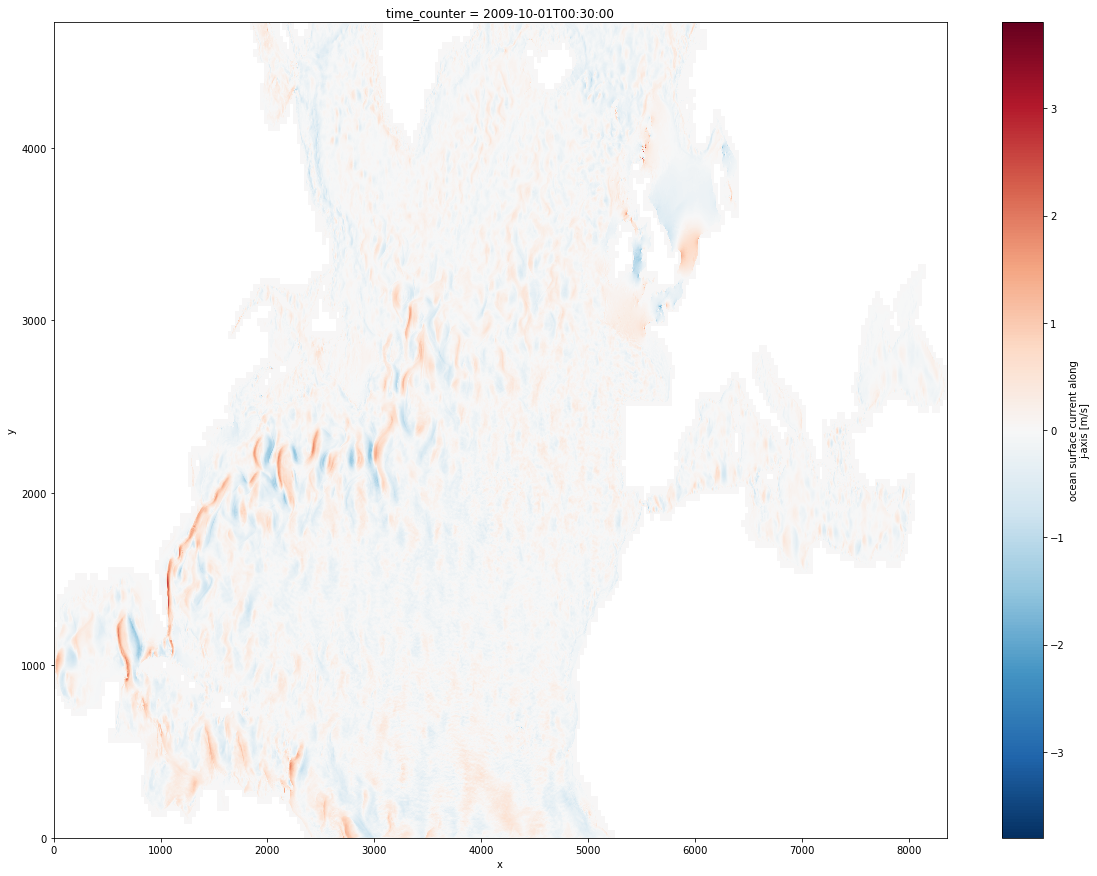

In [14]:
fig=plt.figure(figsize=(20,15))
ds.sel(time_counter=date)['somecrty'].plot()

In [7]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import matplotlib.cm as mplcm

seq_cmap = mplcm.Blues
div_cmap = mplcm.seismic


In [24]:
def plot_surf(sub,data,lon,lat,vmin,vmax,cmap,title,date):
    
    ax = plt.subplot(sub,projection=ccrs.PlateCarree(central_longitude=0))
    land = cfeature.GSHHSFeature(scale='intermediate',
                                 levels=[1],
                                 facecolor=cfeature.COLORS['land'])
    ax.add_feature(land)
    gl = ax.gridlines(draw_labels=True, linestyle=':', color='black',
                      alpha=0.5)
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    ax.tick_params('both',labelsize=22)

    plt.contourf(lon,lat,data,np.arange(-2,2,0.1),cmap=cmap)
    plt.colorbar(orientation='horizontal',pad=0.1, aspect=50)
    plt.title(title)
    ax.text(0.57, -0.08, date, transform=ax.transAxes)


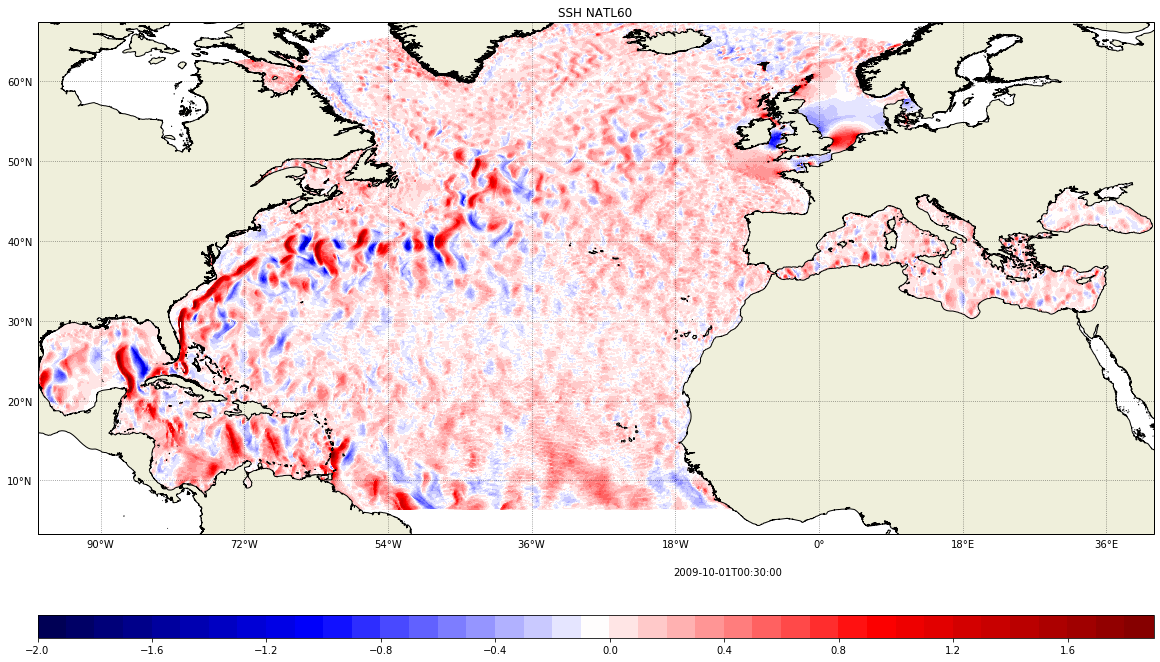

In [25]:
date='2009-10-01T00:30:00'
lat=ds.nav_lat.values
lon=ds.nav_lon.values


data=ds.sel(time_counter=date)['somecrty'].values

fig=plt.figure(figsize=(20,15))
plot_surf(111,data,lon,lat,-2,2,div_cmap,'SSV NATL60',date)